In [5]:
import spacy
nlp=spacy.load('en_core_web_sm')

In [96]:

from spacy import displacy


doc = nlp("London has more Indian restaurants than Mumbai or Delhi.")
displacy.render(doc, style="dep")


In [79]:
def Findentities(sent):

    ent1 = ""
    ent2 = ""

    prv_tok_dep = ""    
    prv_tok_text = ""   

    prefix = ""
    modifier = ""

  
  
    for tok in nlp(sent):
#         print(tok.dep_,tok,'pre: '+prefix,"mod: "+modifier)
        if tok.dep_ != "punct":

            if tok.dep_ == "compound":
                prefix = tok.text

                if prv_tok_dep == "compound":
                    prefix = prv_tok_text + " "+ tok.text
      

            if tok.dep_.endswith("mod") == True:
                modifier = tok.text

                if prv_tok_dep == "compound":
                    modifier = prv_tok_text + " "+ tok.text
      

            if tok.dep_.find("subj") == True:
                ent1 = modifier +" "+ prefix + " "+ tok.text
                prefix = ""
                modifier = ""
                prv_tok_dep = ""
                prv_tok_text = ""      


        if tok.dep_.find("obj") == True:
            ent2 = modifier +" "+ prefix +" "+ tok.text
            modifier=""
            prefix=ent2

        prv_tok_dep = tok.dep_
        prv_tok_text = tok.text
#         print(prv_tok_dep,prv_tok_text)

    return [ent1.strip(), ent2.strip()]

In [80]:
Findentities('London has more Indian restaurants than Mumbai or Delhi.')

['London', 'Indian  restaurants Mumbai']

In [131]:

for i in nlp('London has more Indian restaurants than Mumbai or Delhi.'):
    print(i,'.....',i.dep_,'......',spacy.explain(i.dep_))

London ..... nsubj ...... nominal subject
has ..... ROOT ...... None
more ..... amod ...... adjectival modifier
Indian ..... amod ...... adjectival modifier
restaurants ..... dobj ...... direct object
than ..... prep ...... prepositional modifier
Mumbai ..... pobj ...... object of preposition
or ..... cc ...... coordinating conjunction
Delhi ..... conj ...... conjunct
. ..... punct ...... punctuation


In [82]:
# txt=['Indian tennis player Sumit Nagal moved up six places from 135 to a career-best 129 in the latest men’s singles ranking',
# 'The 22-year-old recently won the ATP Challenger tournament',
# 'He made his Grand Slam debut against Federer in the 2019 US Open',
# 'Nagal won the first set',"the album's lyrics were written by jaideep sahni, raftaar and nakod.",
#      "vocals were provided by trivedi, raftaar, ayushmann khurrana, arijit singh, abhijeet \
#      srivastava, aakansha sharma, shadab faridi and altamash faridi.",
#      "popular actors include shah rukh khan, ajay devgan, sunny deol, aishwarya rai, preity zinta, and madhuri dixit.",
#     "teenage singer deanna durbin starred in pasternak's first american film, three smart girls .",
#     "a sequel, titled kingsman: the golden circle, was released in september 2017.",
# "a prequel, titled the king's man, is set to be released in february 2020.",
#     "they have a daughter, phelix imogen fincher, born 1994.",
#     "vijayakar of india-west summed up with, in short",
#     "the new company, 20th century-fox film corporation, began trading on may 31, 1935.",
#     "a few months after starting anew, purdum resigned as director."]


In [227]:
import csv
txt=[]
with open('text2.csv','r') as f:
    csv_data=csv.reader(f)
    txt=[i[0] for i in csv_data]
print(txt)
        

['India comes seventh-largest country by land area.', 'New Delhi is a capital of India.', 'Ram Nath Kovind elected President of India ', 'Narendra Modi elected Prime Minister of India since 2014', 'Field Hockey is considered as the national game of India', 'In 1928, India won its first Olympic gold medal', 'India is the second most populated country in the world', 'Virat Kohli is the current team captain of India from 2014', 'India first participated at the Olympic Games in 1900', 'Indian athletes have won 28 medals, all at the Summer Games', ' Shuttler P. V. Sindhu became the first Indian woman to win a silver medal in Olympics', 'Sushil Kumar became the first Indian with multiple individual Olympic medals ', 'India is also one of the largest democracies in the world.', 'India has more than 300,000 active mosques', 'The second largest producer of engineers and scientists is from India', 'London has more Indian restaurants than Mumbai or Delhi.', 'India leads the world with the largest

In [228]:
for i in txt:
    print(Findentities(i))

['India', 'land area']
['New Delhi', 'India']
['Ram Nath Kovind', 'President India']
['Narendra Modi', 'Prime Minister India 2014']
['Field Hockey', 'national  game India']
['1928 India', 'Olympic gold medal']
['India', 'populated  world']
['Virat Kohli', 'current team India 2014']
['India', 'first Olympic Games 1900']
['Indian  athletes', 'all Summer Games']
['P. V. Sindhu', 'Indian silver medal Olympics']
['Sushil Kumar', 'Olympic  medals']
['India', 'largest  democracies world']
['India', 'active  mosques']
['largest  producer', 'engineers India']
['London', 'Indian  restaurants Mumbai']
['India', 'largest   world number films']


In [229]:
entity_pairs = []
from tqdm import tqdm 
for i in tqdm(txt):
    entity_pairs.append(Findentities(i))

100%|█████████████████████████████████████████| 17/17 [00:00<00:00, 108.20it/s]


In [230]:
entity_pairs

[['India', 'land area'],
 ['New Delhi', 'India'],
 ['Ram Nath Kovind', 'President India'],
 ['Narendra Modi', 'Prime Minister India 2014'],
 ['Field Hockey', 'national  game India'],
 ['1928 India', 'Olympic gold medal'],
 ['India', 'populated  world'],
 ['Virat Kohli', 'current team India 2014'],
 ['India', 'first Olympic Games 1900'],
 ['Indian  athletes', 'all Summer Games'],
 ['P. V. Sindhu', 'Indian silver medal Olympics'],
 ['Sushil Kumar', 'Olympic  medals'],
 ['India', 'largest  democracies world'],
 ['India', 'active  mosques'],
 ['largest  producer', 'engineers India'],
 ['London', 'Indian  restaurants Mumbai'],
 ['India', 'largest   world number films']]

In [231]:
from spacy.matcher import Matcher 

def get_relation(sent):

    doc = nlp(sent)

  # Matcher class object 
    matcher = Matcher(nlp.vocab)

  #define the pattern 
    pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},  
            {'DEP':'agent','OP':"?"},  #agent
            {'POS':'ADJ','OP':"?"}]  #affix

    matcher.add("matching_1", None, pattern) 
    
    matches = matcher(doc)
    k = len(matches) - 1

    span = doc[matches[k][1]:matches[k][2]] 

    return(span.text)

In [232]:
relations = [get_relation(i) for i in tqdm(txt)]

100%|█████████████████████████████████████████| 17/17 [00:00<00:00, 117.63it/s]


In [233]:
relations

['comes seventh',
 'is',
 'elected',
 'elected',
 'considered as',
 'won',
 'is',
 'is',
 'participated at',
 'won',
 'became',
 'became',
 'is',
 'has more',
 'is from',
 'has more',
 'leads']

In [234]:

import re
import pandas as pd


pd.Series(relations).value_counts()

is                 4
has more           2
won                2
became             2
elected            2
is from            1
comes seventh      1
leads              1
considered as      1
participated at    1
dtype: int64

In [235]:
source = [i[0] for i in entity_pairs]

target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

In [236]:

import networkx as nx

import matplotlib.pyplot as plt

G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())


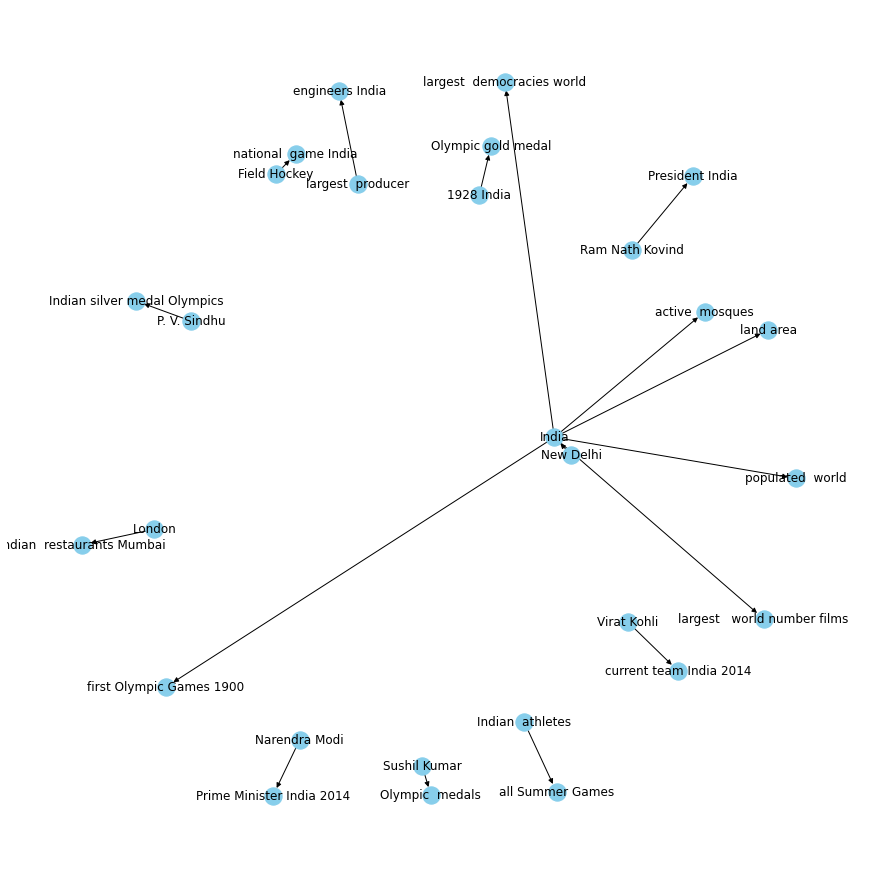

In [237]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

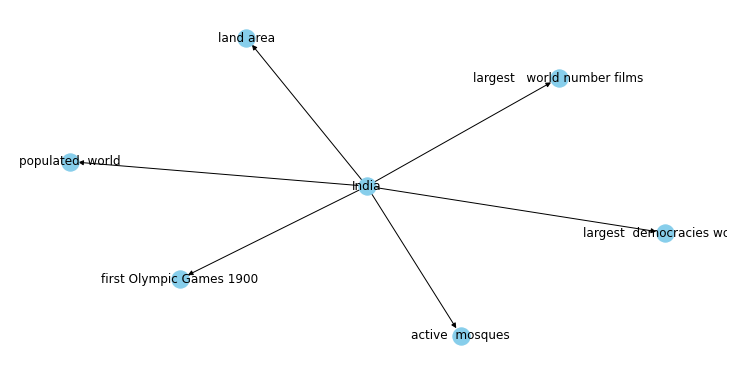

In [248]:
G=nx.from_pandas_edgelist(kg_df[kg_df['source']=="India"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(10,5))
pos = nx.spring_layout(G) 
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [239]:
kg_df

,source,target,edge
0,India,land area,comes seventh
1,New Delhi,India,is
2,Ram Nath Kovind,President India,elected
3,Narendra Modi,Prime Minister India 2014,elected
4,Field Hockey,national game India,considered as
5,1928 India,Olympic gold medal,won
6,India,populated world,is
7,Virat Kohli,current team India 2014,is
8,India,first Olympic Games 1900,participated at
9,Indian athletes,all Summer Games,won
